In [63]:
from keras.datasets import imdb
from keras.preprocessing import sequence

import tensorflow as tf

import os 
import numpy as np

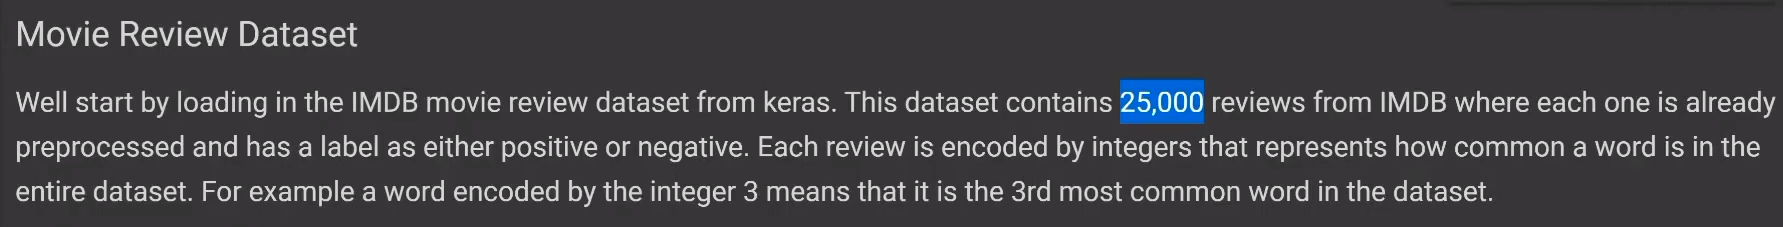

In [64]:
Vocab_size = 88584

maxlen = 250

batch_size = 64

(train_data,train_labels ),(test_data, test_labels) = imdb.load_data(num_words=Vocab_size) 

In [65]:
# len(train_data[0])
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

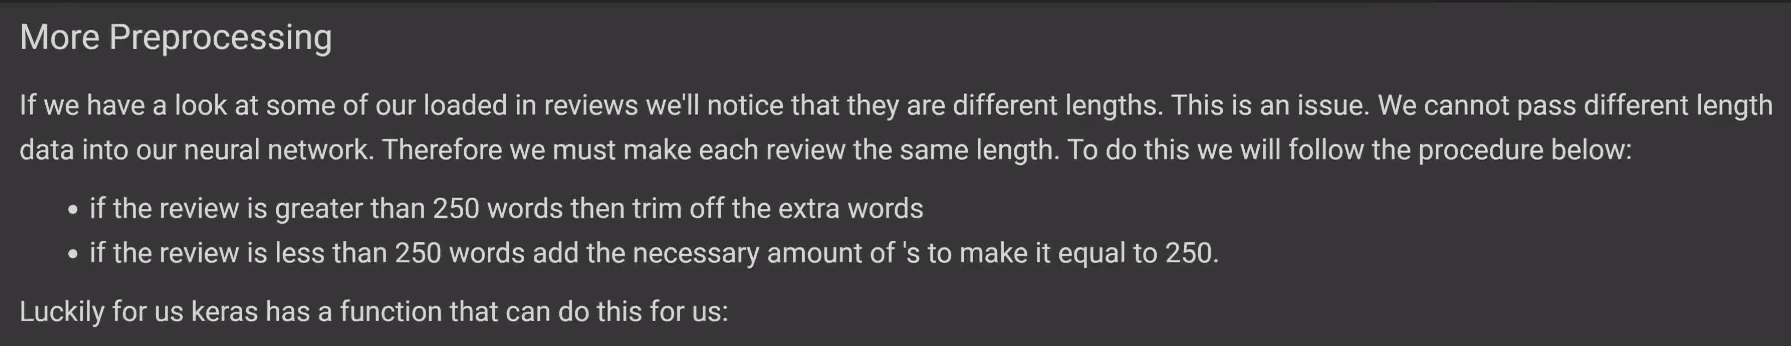

In [66]:
train_data = sequence.pad_sequences(train_data, maxlen)
len(train_data)
test_data = sequence.pad_sequences(test_data, maxlen)
len(test_data)

25000

In [67]:
len(train_data[0])
# train_data[0]


250

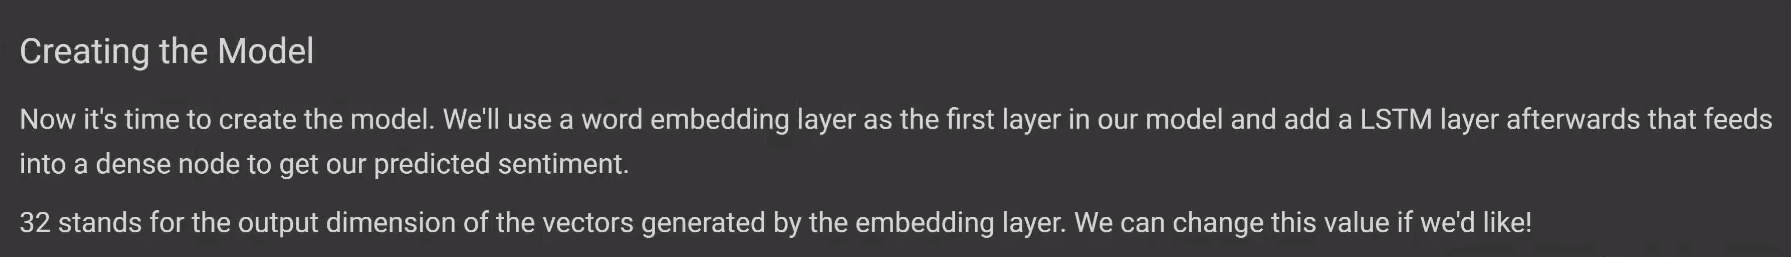

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(Vocab_size,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

In [1]:
model.summary()

NameError: name 'model' is not defined

# Training 
## Now it's time to complie and train the model

In [70]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['acc'])
print(len(train_data))


25000


In [71]:
# history = model.fit(train_data, train_labels,epochs=10, validation_split=0.2)

In [72]:
results = model.evaluate(test_data, test_labels)

782/782 [==============================] - 8s 9ms/step - loss: 0.6930 - acc: 0.5088


In [73]:
print(results)

[0.6929927468299866, 0.5087599754333496]


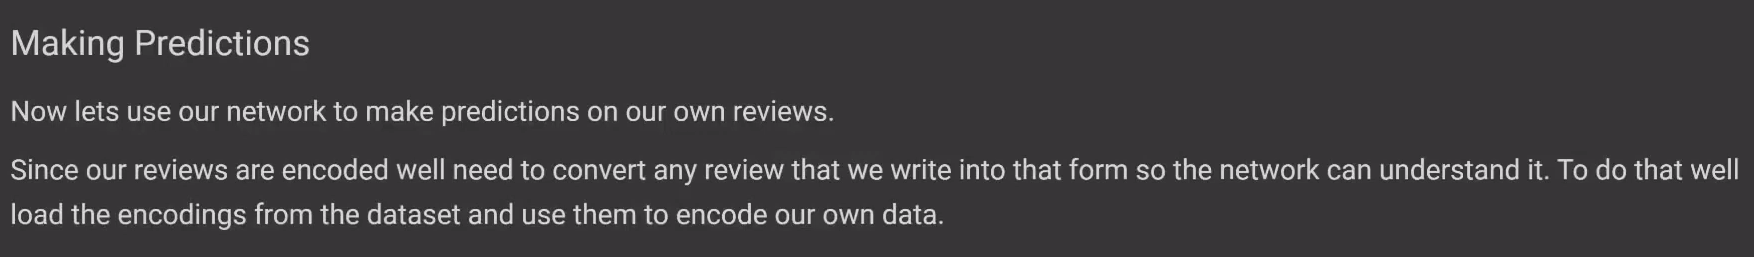

In [92]:

# from tensorflow.keras.datasets import imdb
# from tensorflow.keras.preprocessing import text
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# word_index = imdb.get_word_index()


# def encode_text(text):
#     tokens = keras.prepprocessing.text.text_to_word_sequence(text)
#     tokens = [word_index[word] if word in word_index else 0 for word in tokens]

# text = "that movie was amazing , so ammazing"
# encoded = encode_text(text)
# # print(encoded)



word_index = imdb.get_word_index()
print('word_index', word_index['movie'])
print(type(word_index))
print(len(word_index))

def encode_text(text):
    tokens = text.split()
    print(tokens)    
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]

    # tokens = []
    # for word in tokens:
    #     if word in word_index:
    #         tokens.append(word_index[word])
    #     else:
    #         tokens.append(0)

    print('after--process', tokens)
    return tokens

text = "that movie was amazing , so amazing . i love it so much"
encoded = encode_text(text)
print(encoded)


word_index 17
<class 'dict'>
88584
['that', 'movie', 'was', 'amazing', ',', 'so', 'amazing', '.', 'i', 'love', 'it', 'so', 'much']
after--process [12, 17, 13, 477, 0, 35, 477, 0, 10, 116, 9, 35, 73]
[12, 17, 13, 477, 0, 35, 477, 0, 10, 116, 9, 35, 73]


In [93]:
# while were at it lets make a decode function

reverse_word_index = {value : key for (key,value) in word_index.items()}

def decode_integers(encoded):
    pad = 0
    text =""
    for num in encoded:
        if num !=pad:
            text += reverse_word_index[num] + " "
    return text[:-1]
print(decode_integers(encoded))

that movie was amazing so amazing i love it so much


In [103]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict(text):
    encoded_text = encode_text(text)
    encoded_text = pad_sequences([encoded_text], maxlen=250)  # Pad or truncate to length 250
    result = model.predict(encoded_text)
    print(result[0])

positive_review = "That was so awesome. Great movie"
predict(positive_review)

negative_review = "That movie sucked. I hated it so much . bad movie"
predict(negative_review)


['That', 'was', 'so', 'awesome.', 'Great', 'movie']
after--process [0, 13, 35, 0, 0, 17]
1/1 [==============================] - 0s 21ms/step
[0.49931505]
['That', 'movie', 'sucked.', 'I', 'hated', 'it', 'so', 'much', '.', 'bad', 'movie']
after--process [0, 17, 0, 0, 1797, 9, 35, 73, 0, 75, 17]
1/1 [==============================] - 0s 16ms/step
[0.49733368]
